In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from NLP_utils import *
import numpy as np

In [1]:
import pandas as pd

df = pd.read_csv("real_final_after_merge.csv")
titles = df["title"].unique()

df_title_1 = df[df["title"] == '콩쥐팥쥐전']

In [2]:
titles

array(['광작(廣作)', '귀향(歸鄕)', '금방울전(金鈴傳)', '김원전(金圓傳)', '까치전',
       '박씨전 (고대본)(朴氏傳)', '박씨전(朴氏傳)', '방한림전(方翰林傳)', '배비장전(裵裨將傳)', '비부(婢夫)',
       '서동지전(鼠同知傳)', '숙영낭자전(淑英娘子傳)', '숙향전(淑香傳)', '안동랑(安東郞)',
       '열녀춘향수절가(烈女春香守節歌)', '영영전(英英傳)', '옥단춘전(玉丹春傳)', '옹고집전(壅固執傳)', '우마마',
       '운영전 (국립도서관본)(雲英傳)', '임진록(壬辰錄)', '장경전 (경판25장본 대영박물관소장)(張景傳)',
       '장끼전(雄雉傳)', '장백전(張伯傳)', '장화홍련전', '정수정전 (경판16장본)(鄭秀貞傳)',
       '최고운전(崔孤雲傳)', '콩쥐팥쥐전', '토끼전', '토생전 (경판본)(兎生傳)', '현수문전 (경판본)(玄壽文傳)',
       '홍계월전(洪桂月傳)'], dtype=object)

In [4]:
sl_list_1 = list(df_title_1.loc[df_title_1["speaker_listener"].notnull(), "speaker_listener"])
sl_list_1

['[]',
 '[]',
 "[{'화자': ['어머니'], '청자': [], 'num_sentence': 2}]",
 "[{'화자': ['어머니'], '청자': [], 'num_sentence': 2}, {'화자': ['콩쥐', '검은소'], '청자': [], 'num_sentence': 1}, {'화자': ['콩쥐', '검은소'], '청자': [], 'num_sentence': 12}]",
 "[{'화자': ['콩쥐', '검은소'], '청자': ['콩쥐'], 'num_sentence': 1}, {'화자': ['콩쥐', '검은소'], '청자': [], 'num_sentence': 4}, {'화자': ['콩쥐'], '청자': [], 'num_sentence': 1}, {'화자': ['콩쥐'], '청자': [], 'num_sentence': 3}, {'화자': ['콩쥐'], '청자': [], 'num_sentence': 2}]",
 "[{'화자': ['콩쥐', '제'], '청자': [], 'num_sentence': 2}, {'화자': ['콩쥐'], '청자': [], 'num_sentence': 1}, {'화자': ['콩쥐', '부인'], '청자': [], 'num_sentence': 2}, {'화자': ['콩쥐', '부인'], '청자': [], 'num_sentence': 1}]",
 '[]',
 "[{'화자': ['콩쥐', '부인'], '청자': [], 'num_sentence': 6}]",
 "[{'화자': ['차사'], '청자': [], 'num_sentence': 1}, {'화자': ['차사'], '청자': [], 'num_sentence': 4}, {'화자': ['관차'], '청자': [], 'num_sentence': 3}, {'화자': ['관차'], '청자': [], 'num_sentence': 6}]",
 "[{'화자': ['관차'], '청자': [], 'num_sentence': 3}]",
 "[{'화자': ['감사'], '청자': [], 'nu

In [5]:
# eval을 안전하게 사용
def safe_eval(item):
    if isinstance(item, str):
        return eval(item)
    return item

In [6]:
sl_list_1 = [safe_eval(sl) for sl in sl_list_1]

sl_list_flatten = double_to_single(sl_list_1)
sl_list_flatten

[{'화자': ['어머니'], '청자': [], 'num_sentence': 2},
 {'화자': ['어머니'], '청자': [], 'num_sentence': 2},
 {'화자': ['콩쥐', '검은소'], '청자': [], 'num_sentence': 1},
 {'화자': ['콩쥐', '검은소'], '청자': [], 'num_sentence': 12},
 {'화자': ['콩쥐', '검은소'], '청자': ['콩쥐'], 'num_sentence': 1},
 {'화자': ['콩쥐', '검은소'], '청자': [], 'num_sentence': 4},
 {'화자': ['콩쥐'], '청자': [], 'num_sentence': 1},
 {'화자': ['콩쥐'], '청자': [], 'num_sentence': 3},
 {'화자': ['콩쥐'], '청자': [], 'num_sentence': 2},
 {'화자': ['콩쥐', '제'], '청자': [], 'num_sentence': 2},
 {'화자': ['콩쥐'], '청자': [], 'num_sentence': 1},
 {'화자': ['콩쥐', '부인'], '청자': [], 'num_sentence': 2},
 {'화자': ['콩쥐', '부인'], '청자': [], 'num_sentence': 1},
 {'화자': ['콩쥐', '부인'], '청자': [], 'num_sentence': 6},
 {'화자': ['차사'], '청자': [], 'num_sentence': 1},
 {'화자': ['차사'], '청자': [], 'num_sentence': 4},
 {'화자': ['관차'], '청자': [], 'num_sentence': 3},
 {'화자': ['관차'], '청자': [], 'num_sentence': 6},
 {'화자': ['관차'], '청자': [], 'num_sentence': 3},
 {'화자': ['감사'], '청자': [], 'num_sentence': 1},
 {'화자': ['감사'], '청자': 

* `{"화자": ["천자", "공"], "청자": ["김씨"], "num_sentence": 6}` 형식이 기본 element인 리스트 데이터를 받는다고 가정
* `["공", "형", "동생"]` 메인 캐릭터 리스트도 받음

In [7]:
plt.rc('font', family='Malgun Gothic')

## Main Character

### Characters 대사 비율

In [9]:
from collections import defaultdict

def compute_line_count(sl_list):
    sl_list = [safe_eval(sl) for sl in sl_list]

    line_count = defaultdict(int)
    for speaker_listener in sl_list:
        speaker, listener, interaction = speaker_listener["화자"], speaker_listener["청자"], speaker_listener["num_sentence"]

        for s in speaker:
            line_count[s] += interaction
        for l in listener:
            line_count[l] += interaction
    return line_count

In [10]:
import matplotlib.pyplot as plt

def plotting_count(title, result, top_k=20, plot=True):
    # defaultdict에서 키가 숫자인 것을 제거
    result.pop(0, None)

    # 딕셔너리를 키 값에 따라 정렬
    sorted_result = dict(sorted(result.items(), key=lambda item: item[1], reverse=True))
    avg_line_count = np.mean(list(sorted_result.values()))

    # 상위 k개 항목 선택
    if len(sorted_result) <= top_k:
        selected_items = sorted_result
    else:
        selected_items = dict(list(sorted_result.items())[:top_k])

    if plot:
        plt.figure(figsize=(12, 8))
        # 히스토그램 그리기
        plt.bar(selected_items.keys(), selected_items.values())
        plt.axhline(y=avg_line_count, color='r', linestyle='--', label='Average Line Count')

        plt.xlabel('Speaker')
        plt.ylabel('Number of Lines')
        plt.title(f'<{title}> Line Top-{top_k} Count')
        plt.xticks(rotation=30)  # x축 라벨 회전
        plt.show()

    return sorted_result

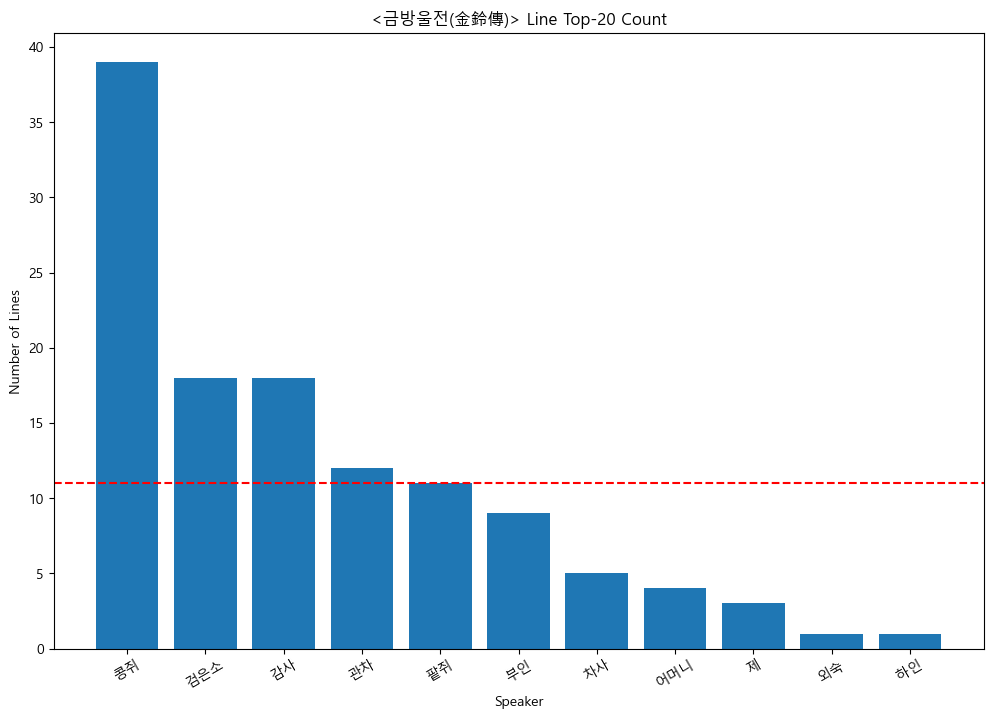

In [11]:
count_res = compute_line_count(sl_list_flatten)
character_list = plotting_count("금방울전(金鈴傳)", count_res)

### Main Character 추출

In [12]:
def extract_main_characters(cha_list):
    total = len(cha_list)
    
    values = np.array([*cha_list.values()])

    # Q3 (제 3사분위수) 계산
    Q3 = np.percentile(values, 75)
    
    # Q3를 초과하는 값의 개수 세기
    count = sum(1 for v in values if v > Q3)

    N = min(total, max(10, count))

    return [*cha_list.keys()][:N]

In [13]:
main_characters = extract_main_characters(character_list)

# 1. Interaction score

## Matrix 구성

In [14]:
import numpy as np

def compute_network_density(sl_list, c_list):
    N = len(c_list)
    mat = np.zeros((N,N))     # 2차원 행렬 구성, Symmetric
    score = 0

    # 레이블링
    label_dict = {item: index for index, item in enumerate(c_list)}

    # str -> dict
    sl_list = [safe_eval(sl) for sl in sl_list]

    # 인물 수 계산
    current_c_list = []

    for speaker_listener in sl_list:
        speaker, listener, interaction = speaker_listener["화자"], speaker_listener["청자"], speaker_listener["num_sentence"]
        
        # interaction 인물들만 고려
        speaker = [s for s in speaker if s in c_list]
        listener = [l for l in listener if l in c_list]

        # 청자가 없는 경우, 자기 자신 셀에 입력
        if len(listener) == 0:
            for s in speaker:
                if s not in current_c_list:
                    current_c_list.append(s)
                i = label_dict[s]
                mat[i, i] += interaction
        else:
            for s in speaker:
                if s not in current_c_list:
                    current_c_list.append(s)
                i = label_dict[s]
                for l in listener:
                    if l not in current_c_list:
                        current_c_list.append(l)
                    j = label_dict[l]
                    mat[i, j] += interaction
                    mat[j, i] += interaction
    
    score = (len(current_c_list) ** 2) * np.sum(mat) / (N * (N-1) / 2)

    return {"Interaction matrix": mat,
            "Interaction score": score,
            "Key characters": c_list}

### 정규화

In [15]:
def softmax(score_list):
    score_list = np.array(score_list)
    return np.exp(score_list) / np.sum(np.exp(score_list))

In [16]:
def log_normalize(score_list):
    score_list = np.array(score_list)
    return np.log(1+score_list) / np.sum(np.log(1+score_list))

In [17]:
def normalize(score_list):
    score_list = np.array(score_list)
    return score_list / np.sum(score_list)

In [24]:
from scipy.stats import rankdata

def compute_uniform_rank(score_list):
    N = len(score_list)
    # 점수 리스트를 내림차순으로 정렬하여 랭크를 매김
    ranks = rankdata(score_list, method='max')

    # 랭크를 0부터 1까지 N등분하여 uniform하게 점수를 부여
    uniform_scores = np.array([(rank - 1) / (len(score_list) - 1) for rank in ranks])

    return uniform_scores

In [26]:
interaction_list = [compute_network_density(sl, main_characters) for sl in sl_list_1]
interaction_score_list = np.array([i["Interaction score"] for i in interaction_list])

IntScore = compute_uniform_rank(interaction_score_list)
# print(interaction_score_list)
print(IntScore)

[0.1875 0.1875 0.3125 1.     0.8125 0.875  0.1875 0.6875 0.75   0.375
 0.9375 0.4375 0.5    0.5625 0.6875 0.1875 0.25  ]


* rank로 하는 것이 가장 좋았음, 0부터 1까지 균등하게 반영할 수 있음

In [20]:
df_sub_idx = df_title_1.index

max_score = IntScore.max()
min_score = IntScore.min()

max_idx = np.where(IntScore == max_score)
min_idx = np.where(IntScore == min_score)

print(f"Interaction Max {max(IntScore):.4f}")
print(df.loc[df_sub_idx[max_idx[0][0]], "quote_dup_fixed"])
print()
print(f"Interaction Min {min(IntScore):.4f}")
print(df.loc[df_sub_idx[min_idx[0][0]], "quote_dup_fixed"])

Interaction Max 1.0000
그때 갑자기 하늘에서 검은 소 한 마리가 내려오더니 콩쥐를 보고 묻는 것이었다. "너는 무슨 일이 있어서 그만큼 우는 거니? 내게 자세한 이야기를 해봐." 콩쥐가 일어난 순서를 이야기하자 검은소가 말했다. "그러면 너는 바로 발을 씻는 곳에 가서 발 씻고, 손을 씻는 곳에 가서 손 씻고, 얼굴을 씻는 곳에 가서 낯 씻고 와." 콩쥐는 그대로 손과 발, 얼굴을 씻고 한참 후에 돌아왔어. 그러자 검은 소는 좋은 농사일 도구와 여러 가지 과일을 옷자락에 싸 주고는 갑자기 사라져 버리는 거였어. 콩쥐는 그 선물을 받았지만 아버지께도 보여주고 어머니께도 이야기하며 팥쥐와도 공평하게 나눠 먹을 생각으로 아무것도 입에 넣지 않았어. 그리고 잠시 동안에 몇 마지기 밭을 가다듬고 집으로 돌아왔어. 그런데 문은 이미 닫혀 있었고, 집 안에서는 저녁밥을 해 먹고 있는 팥쥐와 함께 앉아 즐겁게 식사하고 있는 것 같았어. 콩쥐는 작은 쥐가 문 틈으로 과일을 밀어 넣어서 안으로 들어갈 수 있었어. 하지만 그 과일이 통째로 빼앗겨서 오히려 콩쥐에게 큰 불행이 찾아왔어. 대대로 배씨의 명령이 내려진 것이었어. "콩쥐야, 여기 와봐. 네가 시킨 김이나 뭐 그런 거 할 때는 빨리 끝내고 돌아와서 밥 먹고 다른 할 일도 해야지. 그동안 뭐 했니? 그리고 잘못한 건 어디서 나왔다고 생각해? 이건 분명히 부당한 일로 보이는데, 그 사람이 분명히 나쁜 소리를 듣고 얻은 거야!" "네 그렇지 않으면 어디서 나온다고 말하냐? 소녀가 나이가 열댓살 정도로 젊어서 이미 지나가는 사람들을 괴롭히는 거야? 이런 짓을 네 아버지께서 알게 되면 큰일 날 거야! 이 사람은 이기적인 사람이야. 이것을 빨리 처리하고 아버지가 알지 못하게 해. 알아차릴 날이면 누나는 죽는 날이야. 누나는 충분히 먹었으니 그만두고 너가 빨리 처리해." 콩쥐는 밥도 얻어먹지 못하고 그 날 밤을 눈물로 울면서 보냈다.

Interaction Min 0.1875
콩쥐팥쥐전 조선 시대 중엽, 전라도 전주

* Interaction이 괜찮은 지표인 듯!

# 2. Diversity

## 2-1. Character Variation

In [21]:
def compute_character_variation(s1, s2, character_list):
    s1 = safe_eval(s1)
    s2 = safe_eval(s2)
    character_list = safe_eval(character_list)

    s1_set = set([s for s in s1 if s in character_list])
    s2_set = set([s for s in s2 if s in character_list])

    # 합집합 구하기
    union_set = s1_set.union(s2_set)

    # 교집합 구하기
    intersection_set = s1_set.intersection(s2_set)

    if len(union_set) > 0:
        cv = 1 - len(intersection_set) / len(union_set)
    else:
        cv = 0

    return cv

In [22]:
df_sub_idx = df_title_1.index

In [27]:
CvScore = np.array([])

character_list

for i in range(len(df_sub_idx) - 1):
    s1 = df.loc[df_sub_idx[i], "NE_tagged_modernized_set"]
    s2 = df.loc[df_sub_idx[i+1], "NE_tagged_modernized_set"]

    character_variation = compute_character_variation(s1, s2, character_list)
    CvScore = np.append(CvScore, character_variation)
CvScore = np.append(CvScore, CvScore[i])

CvScore = compute_uniform_rank(CvScore)     # 정규화
print(CvScore)

[0.5625 0.     0.5625 0.75   0.5625 1.     1.     0.875  0.3125 0.75
 0.8125 0.5625 0.625  0.0625 0.125  0.25   0.25  ]


## 2-2. Sentiment Variation

In [28]:
def compute_sentiment_variation(sentiment_scores):
    sentiment_scores = safe_eval(sentiment_scores)
    sentiment_scores = np.array(sentiment_scores)
    N = len(sentiment_scores)

    sentiment_degree = np.sum(np.abs(sentiment_scores)) / N
    sentiment_bias = np.abs(np.mean(sentiment_scores))

    return sentiment_degree - sentiment_bias

In [29]:
sentiments = df.loc[0, "sentiment_score"]
print(sentiments)
print(compute_sentiment_variation(sentiments))

[0.0, 0.0, -0.8325576186180115, -0.901943862438202, -0.9148744344711304, -0.7584396600723267, -0.7943747639656067, 0.0, -0.7811559438705444, 0.0, -0.9944974780082704, -0.7866427302360535, 0.8344453573226929, -0.4044724404811859, -0.921560525894165, -0.7988924980163574, 0.0, -0.6668367981910706, -0.963058352470398, 0.0, 0.0]
0.07947098641168504


In [30]:
SvScore = np.array([])

for i in range(len(df_sub_idx)):
    sentiments = df.loc[df_sub_idx[i], "sentiment_score"]

    sentiment_variation = compute_sentiment_variation(sentiments)
    SvScore = np.append(SvScore, sentiment_variation)
SvScore = compute_uniform_rank(SvScore)     # 정규화
print(SvScore)

[0.4375 0.875  0.1875 0.25   0.1875 1.     0.9375 0.1875 0.75   0.5
 0.375  0.3125 0.1875 0.6875 0.625  0.8125 0.5625]


# 3. Line Proportion

In [31]:
def compute_proportion(idx, total_idx):
    scene = df.loc[idx, "sentence_length"]
    total_scene = sum(df.loc[total_idx, "sentence_length"])

    return scene / total_scene

In [32]:
PropScore = np.array([])

for i in df_sub_idx:
    prop_score = compute_proportion(i, df_sub_idx)
    PropScore = np.append(PropScore, prop_score)
PropScore = compute_uniform_rank(PropScore)     # 정규화
print(PropScore)

[0.1875 0.5    0.125  0.6875 0.875  0.9375 0.25   0.     0.75   0.375
 0.8125 0.5625 0.3125 0.625  1.     0.4375 0.0625]


# 4. 장면 뽑기!

## 1. 시각화

In [33]:
# 최종 LSP 스코어 구하기

LSP_score = IntScore + CvScore + SvScore + PropScore
LSP_score

array([1.375 , 1.5625, 1.1875, 2.6875, 2.4375, 3.8125, 2.375 , 1.75  ,
       2.5625, 2.    , 2.9375, 1.875 , 1.625 , 1.9375, 2.4375, 1.6875,
       1.125 ])

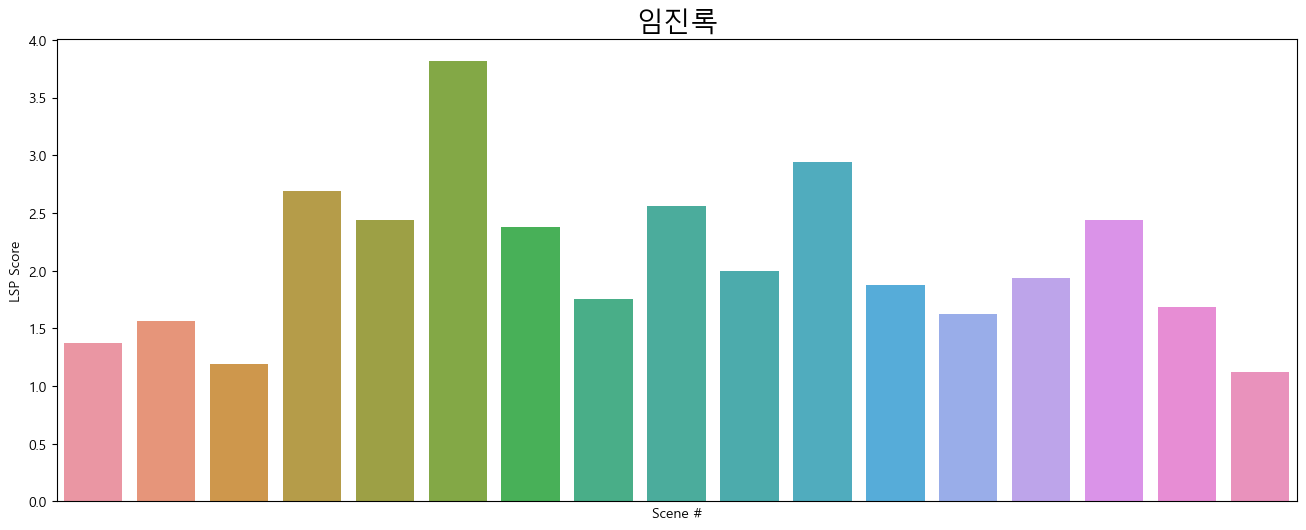

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,6))
sns.barplot(x=np.arange(len(LSP_score)), y=LSP_score)
plt.xticks([])
plt.title("임진록", fontsize=20)
plt.xlabel("Scene #")
plt.ylabel("LSP Score")
plt.show()

## 2. Top-k / Worst-k

In [35]:
sorted_indices = np.argsort(LSP_score)

# 높은 점수 순으로 상위 3개의 인덱스
top_3_high_indices = sorted_indices[-3:][::-1]

# 낮은 점수 순으로 하위 3개의 인덱스
worst_3_low_indices = sorted_indices[:3]

In [36]:
for top in top_3_high_indices:
    print(LSP_score[top])
    print(IntScore[top])
    print(CvScore[top])
    print(SvScore[top])
    print(PropScore[top])
    print(df.loc[df_sub_idx[top], "quote_dup_fixed"])
    print()

3.8125
0.875
1.0
1.0
0.9375
그러구려 세월을 보내는데 콩쥐의 외갓집 조씨 댁에서 무슨 잔치가 있어 콩쥐를 불렀다. 그러자 염치도 없고 인사도 모르는 계모인 배씨는 큰 마누라 본가 잔치에 무슨 체면으로 나서려는지 콩쥐는 젖혀 놓고 제가 먼저 날뛰는 것이었다. "콩쥐야, 너는 집을 잘 보호해. 잠시 나가 있을 테니, 만약 너도 나와 함께 가고 싶다면 딱딱한 것을 부수어 먹을 겉피 석 섬만 깨끗이 부수어 놓고 기다려." 그리고는 비단 저고리를 꺼내 입고 싸두었던 진신을 꺼내 신고 한동안 수선을 피우며 맵시를 내더니 팥쥐만 데리고 떠났다. 

맵시: 물건들을 묶어서 들고 다니는 것 하는 수 없이 콩쥐는 혼자 쓰러져서 눈물을 흘리며 겉면 석 섬을 마당에 널어 놓고 무엇인가를 만들거나 짜는 도구 위에 올라앉아서 소리나는 모습으로 일을 시작하였다. 그러나 무슨 능력으로 한 필 베를 짜며 석 섬 겉면을 찢으랴? 콩쥐는 얼마나 울었던지 정신을 못 차릴 지경이었다. 그런데 이게 웬일인가? 콩쥐가 한 번도 보지 못한 예쁜 여인이 눈부시게 빛나는 비단옷을 세련되게 차려 입고 퍼지면서 향기를 풍기며 분명한 모습으로 뚜렷한 베틀 앞에 다가서며 콩쥐를 보고 베틀에서 내려오기를 서두르는 것이었다. "내가 비록 재주는 없어도 다른 사람에게 빌린다면 바로 만들어 줄 테니 아가씨는 곧 떠날 돈을 마련하도록 해요." 콩쥐가 농작물을 갈기 위해 소를 끌어가는 농기구에서 내려오자, 부인은 농기구에 올라앉아 알마 안 가서 짜던 것을 다 마치고 농기구에서 내려오며 말했다. "아가씨, 이제 일이 끝났으니 어서 다른 집안에 가세요. 또한 도중에서 좋은 기회도 있을 테니 되도록 참아 보면 차차 고생을 면하고 부유하고 풍요로운 삶을 살게 될지도 모르는 일이에요." 그러고는 한 명주로 만든 고급스러운 보자기를 풀어 헤치더니 새로 지은 옷 한 벌과 머리에 쓰는 머리띠와 신발까지 새것을 내주면서, "나는 하늘에서 내려와 사람을 도우며 예언하는 신비한 여자로서 하늘의 왕의 허락을 받고 이와 같이

In [227]:
for worst in worst_3_low_indices:
    print(LSP_score[worst])
    print(IntScore[worst])
    print(CvScore[worst])
    print(SvScore[worst])
    print(PropScore[worst])
    print(df.loc[df_sub_idx[worst], "quote_dup_fixed"])
    print()

0.9736842105263158
0.10526315789473684
0.34210526315789475
0.013157894736842105
0.5131578947368421
선시에 심유경이 일본에 들어가 소섭으로 더불어 관백의 항표를 가지고 중국에 돌아오니 천조가 거짓 항표라 하여 의심하더니 오래지 아니하여 적이 진주를 함몰하니 그 일이 허탄한지라. 중국이 소섭을 요동에 두고 오래 희보치 아니하더라.
→ 선시에 심유경이 일본에 들어가 일본과 중국을 오가는 배의 표지판을 가지고 중국에 돌아왔는데, 매우 큰 수를 거짓으로 표시한 항표라고 해서 의심을 받았다. 오래되지 않아서 적이 배를 침몰시켰는데, 그것이 소용없는 일이었다. 중국은 일본을 놀라게 하여 크게 실망시켰다. 이때, 여러 사람이 함께 가는 길인 여송이 제장으로 돌아가고 오직 남성을 장악하는 사람인 오유충과 왕의 명령을 받아 행동하는 왕필적 등을 각각 일지(한 묶음)군을 이끌고 성을 지키는 성주 등처에 주둔하였더니 늙고 병든 병사는 군사의 식량을 운반하기에 어려워하고 전투를 이끄는 장교는 전투에 어려움을 겪을 뿐 아니라 적의 공격을 받는 지역에서 인민이 대부분 죽게 되었고 사람들이 서로 싸워 죽이는 일이 벌어졌다. 군사들이 군대를 다른 곳으로 옮기더니 오래 머물지 않고 경성에 도착하여 십여 일을 머물렀지만 다시 돌아가고, 적은 오히려 해상에 있어서 사람들의 마음이 나빠지고 어수선해졌다. 조선이 다시 청나라 정찰을 담당하는 청병사를 천조에 보내다. 경략사 송응창이 죄를 얻어 돌아가고 고양겸이 요동에 이르러 부장 호척으로 하여금 글을 쓰거나 문서를 작성하여 아국 군사에게 부치니 그 대략에 가라사대, 왜적이 호흡 사이에 조선 삼도를 파하고 왕자와 배신을 사로잡으니 황상이 크게 놀라서 군사를 일으켜 문죄하셨다.
적이 천위를 두려워하여 왕자와 배신을 도로 돌려보내고 마침내 멀리 도망하니 조정이 소국을 대접하심이 이에 지나지 못할지라, 이제 양향을 이루지 못할 것이요, 군사를 또한 다시 쓰지 못할지라, 왜적이 또

# 사용하기

In [37]:
# Title 별로 계산
titles = df["title"].unique()

lambda_i, lambda_c, lambda_s, lambda_p = 1, 1, 1, 1

for title in titles:
    df_sub = df[df["title"] == title]   # 해당 title만 계산
    df_sub_idx = df_sub.index           # 해당 title의 인덱스

    sl_list = list(df_sub.loc[df_sub["speaker_listener"].notnull(), "speaker_listener"])    # 화자, 청자 리스트 뽑기

    sl_list = [safe_eval(sl) for sl in sl_list]                     # eval을 통해 자료구조로 인식하기

    sl_list_flatten = double_to_single(sl_list)                     # 이중 리스트 -> 단일 리스트 (화자, 청자 전체 리스트)
    
    count_res = compute_line_count(sl_list_flatten)                 # 해당 title의 인물 별 총 대사 계산
    character_list = plotting_count(title, count_res, plot=False)   # Main character list 찾기 1 - sort
    main_characters = extract_main_characters(character_list)       # Main character list 찾기 2 - crop

    # 1. Interaction Score
    interaction_list = [compute_network_density(sl, main_characters) for sl in sl_list]
    interaction_score_list = np.array([i["Interaction score"] for i in interaction_list])
    IntScore = compute_uniform_rank(interaction_score_list)         # 랭크를 통한 정규화 (0~1)

    # 2-1. Character Diversity
    CvScore = np.array([])

    for i in range(len(df_sub_idx) - 1):
        s1 = df.loc[df_sub_idx[i], "NE_tagged_modernized_set"]
        s2 = df.loc[df_sub_idx[i+1], "NE_tagged_modernized_set"]

        character_variation = compute_character_variation(s1, s2, character_list)
        CvScore = np.append(CvScore, character_variation)
    CvScore = np.append(CvScore, 1)                                 # 마지막은 1 부여
    CvScore = compute_uniform_rank(CvScore)                         # 랭크를 통한 정규화 (0~1)

    # 2-2. Sentiment Diversity
    SvScore = np.array([])

    for i in range(len(df_sub_idx)):
        sentiments = df.loc[df_sub_idx[i], "sentiment_score"]

        sentiment_variation = compute_sentiment_variation(sentiments)
        SvScore = np.append(SvScore, sentiment_variation)
    SvScore = compute_uniform_rank(SvScore)                         # 랭크를 통한 정규화 (0~1)
    
    # 3. Line Proportion
    PropScore = np.array([])

    for i in df_sub_idx:
        prop_score = compute_proportion(i, df_sub_idx)
        PropScore = np.append(PropScore, prop_score)
    PropScore = compute_uniform_rank(PropScore)                     # 랭크를 통한 정규화 (0~1)

    LSP_score = (lambda_i * IntScore) + (lambda_c * CvScore) + (lambda_s * SvScore) + (lambda_p * PropScore)       # 최종 LSP 스코어
    
    df.loc[df_sub_idx, "IntScore"] = IntScore
    df.loc[df_sub_idx, "CvScore"] = CvScore
    df.loc[df_sub_idx, "SvScore"] = SvScore
    df.loc[df_sub_idx, "PropScore"] = PropScore
    df.loc[df_sub_idx, "LSP_score"] = LSP_score
    
    

In [38]:
df.to_csv("final_with_LSP.csv", index=False)